In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# add the csv files as dataframes
city_file = "Resources/City_data.csv"
ride_file = "Resources/Ride_Data.csv"
city_df = pd.read_csv(city_file)
ride_df = pd.read_csv(ride_file)

In [3]:
complete_df = pd.merge(ride_df,city_df,how = "left", on = ["city"])
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   int64  
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [7]:
# Create Dataframes for different city types
urban_df = complete_df[complete_df["type"] == "Urban"]
suburban_df = complete_df[complete_df["type"] == "Suburban"]
rural_df = complete_df[complete_df["type"] == "Rural"]

In [20]:
#statistics by city'

# get the average rides per city
urban_rides_by_city = urban_df.groupby(["city"]).count()["ride_id"]
suburban_rides_by_city = suburban_df.groupby(["city"]).count()["ride_id"]
rural_rides_by_city = rural_df.groupby(["city"]).count()["ride_id"]

# Get the mean cost by city
urban_cost_by_city = urban_df.groupby(["city"]).mean()["fare"]
suburban_cost_by_city = suburban_df.groupby(["city"]).mean()["fare"]
rural_cost_by_city = rural_df.groupby(["city"]).mean()["fare"]

# driver count by city
urban_driver_count = urban_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_df.groupby(["city"]).mean()["driver_count"]


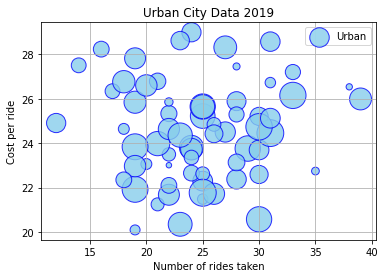

In [34]:
#Create a scatter plot for urban citys
# x = number of rides y = cost fo ride size = number of drivers per city

plt.scatter(urban_rides_by_city,urban_cost_by_city,s = 10*urban_driver_count,color = "skyblue",edgecolor = "blue", linewidths=1,alpha=0.8,label = "Urban")
plt.title("Urban City Data 2019")
plt.xlabel("Number of rides taken")
plt.ylabel("Cost per ride")
plt.grid(True)
plt.legend()

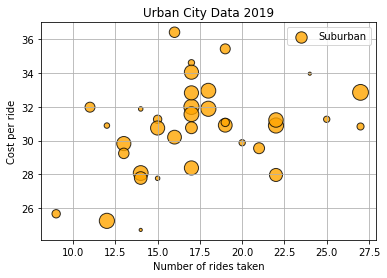

In [36]:
# Create a scatter plot for suburban areas
plt.scatter(suburban_rides_by_city,suburban_cost_by_city,s = 10*suburban_driver_count,color = "orange",edgecolor = "black", linewidths=1,alpha=0.8,label = "Suburban")
plt.title("suburban City Data 2019")
plt.xlabel("Number of rides taken")
plt.ylabel("Cost per ride")
plt.grid(True)
plt.legend()

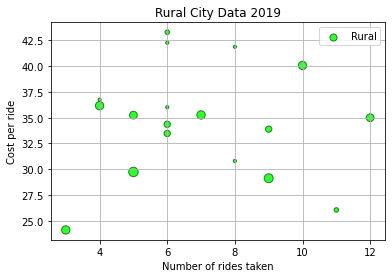

In [40]:
#Creating a scatter plot for rural areas
plt.scatter(rural_rides_by_city,rural_cost_by_city,s = 10*rural_driver_count,color = "lime",edgecolor = "darkgreen", linewidths=1,alpha=0.8,label = "Rural")
plt.title("Rural City Data 2019")
plt.xlabel("Number of rides taken")
plt.ylabel("Cost per ride")
plt.grid(True)
plt.legend()

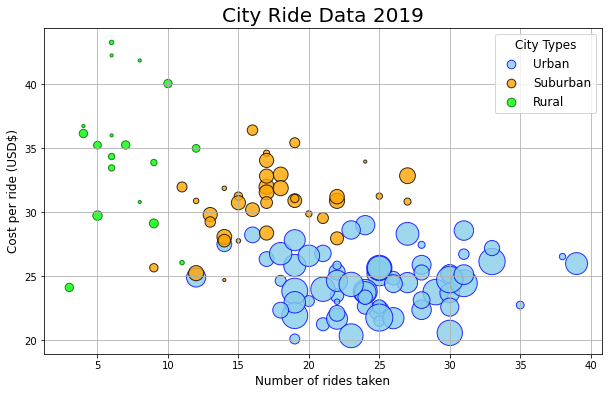

In [57]:
# Creating a plot with all the data
plt.subplots(figsize = (10,6))
#Create a plot for urban areas
plt.scatter(urban_rides_by_city,urban_cost_by_city,s = 10*urban_driver_count,color = "skyblue",edgecolor = "blue", linewidths=1,alpha=0.8,label = "Urban")
# Create a scatter plot for suburban areas
plt.scatter(suburban_rides_by_city,suburban_cost_by_city,s = 10*suburban_driver_count,color = "orange",edgecolor = "black", linewidths=1,alpha=0.8,label = "Suburban")
#Creating a scatter plot for rural areas
plt.scatter(rural_rides_by_city,rural_cost_by_city,s = 10*rural_driver_count,color = "lime",edgecolor = "darkgreen", linewidths=1,alpha=0.8,label = "Rural")

plt.title("City Ride Data 2019",fontsize = 20)
plt.xlabel("Number of rides taken",fontsize = 12)
plt.ylabel("Cost per ride (USD$)",fontsize=12)
plt.grid(True)

# create the ledgend

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.savefig("Analysis/City Ride Data 2019.png")